In [ ]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-04-16 14:58:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  1.18MB/s    in 72s     

2021-04-16 15:00:10 (956 KB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# Melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir("/tmp/images/train")

['clean', 'messy']

In [ ]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
# Membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# Membuat direktori ruangan berantakan pada direktori data trainig
train_messy_dir = os.path.join(train_dir, 'messy')

# Membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# Membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # Direktori data latih
    target_size = (150, 150), # Mengubah resolusi gambar menjadi 150x150 piksel
    batch_size = 4,
    # Karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Direktori data validasi
    target_size = (150, 150), # Mengubah resolusi gambar menjadi 150x150 piksel
    batch_size = 4,
    # Karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile momdel dengan 'adam' optimizer loss function 'binary_crossentropy
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.7081 - accuracy: 0.4500 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6863 - accuracy: 0.5400 - val_loss: 0.6779 - val_accuracy: 0.5500
Epoch 3/20
25/25 - 6s - loss: 0.6623 - accuracy: 0.5000 - val_loss: 0.6320 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 6s - loss: 0.6121 - accuracy: 0.7400 - val_loss: 0.7280 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6997 - accuracy: 0.5400 - val_loss: 0.6358 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 6s - loss: 0.6576 - accuracy: 0.6900 - val_loss: 0.5256 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 6s - loss: 0.5982 - accuracy: 0.7100 - val_loss: 0.4663 - val_accuracy: 1.0000
Epoch 8/20
25/25 - 6s - loss: 0.6402 - accuracy: 0.7100 - val_loss: 0.4447 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 6s - loss: 0.7274 - accuracy: 0.5400 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6931 - accuracy: 0.5400 - val_loss: 0.6631 - val_accuracy: 0.7500
Epoch 11/20
25/25 -

Saving WhatsApp Image 2021-04-16 at 22.07.44.jpeg to WhatsApp Image 2021-04-16 at 22.07.44 (1).jpeg
WhatsApp Image 2021-04-16 at 22.07.44.jpeg
messy


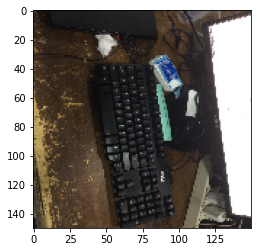

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')